In [70]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [71]:
tips = Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


2.833448275862069
3.0896178343949052


C:\Users\m209120\Downloads\Anaconda_2nd_Download\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


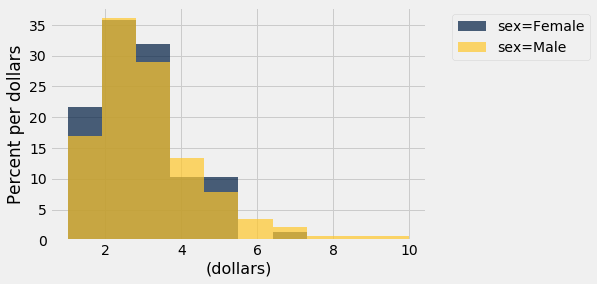

In [72]:
tips.hist('tip', unit = 'dollars', group = 'sex')
mean_female = sum(tips.where('sex','Female').column('tip'))/tips.where('sex', 'Female').num_rows
mean_male = sum(tips.where('sex','Male').column('tip'))/tips.where('sex', 'Male').num_rows
print (mean_female)
print (mean_male)

From the histogram and the average tip data, it seems that men are typically more generous tippers than females. While females were mostly concentrated in the amount they tip, men's tipping was more spread out and had more outliers that tipped very high.

2.7280882352941176
3.102670454545454


C:\Users\m209120\Downloads\Anaconda_2nd_Download\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


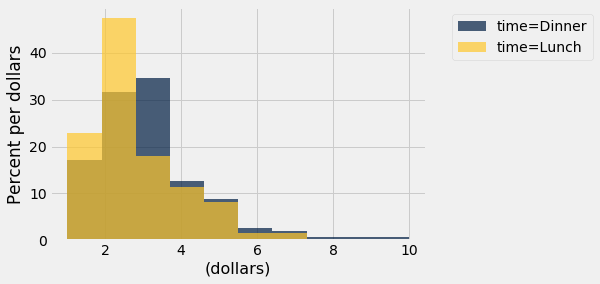

In [73]:
tips.hist('tip', unit = 'dollars', group = 'time')
mean_lunch = (sum(tips.where('time','Lunch').column('tip')))/tips.where('time', 'Lunch').num_rows
mean_dinner = (sum(tips.where('time','Dinner').column('tip')))/tips.where('time', 'Dinner').num_rows
print (mean_lunch)
print (mean_dinner)

From this histogram, we can see that although it seems like dinner tips are generally higher on average, lunch tips for what the customer spends are generally higher. Dinner tips are most likely higher because people are spending more. 

In [74]:

def weekday_to_num(day):
    if day == "Mon":
        return 1
    elif day == "Tue":
        return 2
    elif day == "Wed":
        return 3
    elif day == "Thur":
        return 4
    elif day == "Fri":
        return 5
    elif day == "Sat":
        return 6
    elif day == "Sun": 
        return 7
    else:
        return "this string is not valid"


In [75]:
weekday_to_num('Tue')

2

In [76]:
weekday_tips = tips.with_column(
        'weekday_num', tips.apply(weekday_to_num, 'day'))
weekday_tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


In [77]:
def est_tip(tot_tip): 
    close_points = tips.where("total_bill", are.between(tot_tip-1, tot_tip + 1))
    return close_points.column('tip').mean()

In [78]:
tips_with_prediction = tips.with_column(
    'Tip Prediction', tips.apply(est_tip,'total_bill'))
tips_with_prediction

total_bill,tip,sex,smoker,day,time,size,Tip Prediction
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


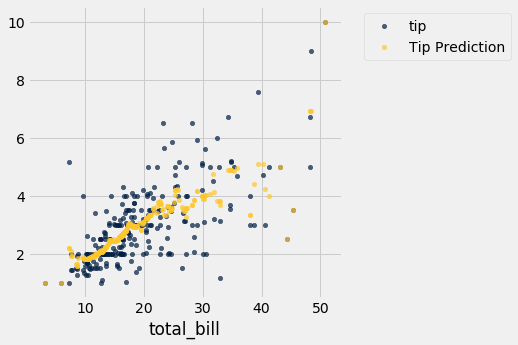

In [79]:
tips_with_prediction.select('total_bill', 'tip', 'Tip Prediction').scatter('total_bill')